In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [19]:
# this data set is about tipping

tips=pd.read_csv('https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/reshape2/tips.csv')

In [20]:
tips.head(6)# pandas is very similar to numpy

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,Female,No,Sun,Dinner,2
1,2,10.34,1.66,Male,No,Sun,Dinner,3
2,3,21.01,3.50,Male,No,Sun,Dinner,3
3,4,23.68,3.31,Male,No,Sun,Dinner,2
4,5,24.59,3.61,Female,No,Sun,Dinner,4
5,6,25.29,4.71,Male,No,Sun,Dinner,4


In [21]:
tips=tips.iloc[:,1:]
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [22]:
# Q1.what is the average tip people gave?

# 从A里提取名叫X的列：
# A.X
# A['X']

tips.tip.mean()

2.9982786885245902

In [24]:
print('%.3f' %tips.tip.mean())

2.998


In [25]:
round(tips.tip.mean(),3)

2.998

In [26]:
# count the frequency of smokers

tips.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [27]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [36]:
smokers=tips.day.value_counts()

In [37]:
smokers['Yes']/(smokers['Yes']+smokers['No'])

KeyError: 'Yes'

In [40]:
nosmoker,smoker=tips.smoker.value_counts()
print(smoker/(nosmoker+smoker))

0.381147540984


In [42]:
tips.groupby(['smoker']).size()

smoker
No     151
Yes     93
dtype: int64

In [47]:
tips.groupby(['smoker']).mean()

,total_bill,tip,size
smoker,,,
No,19.188278,2.991854,2.668874
Yes,20.756344,3.008710,2.408602


In [48]:
tips.groupby(['smoker']).tip.mean()

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

In [49]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [50]:
# groupby more than 1 variable

grouped=tips.groupby(['sex','smoker'])

In [51]:
type(grouped)

pandas.core.groupby.DataFrameGroupBy

In [52]:
grouped.size()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
dtype: int64

In [53]:
pd.crosstab(tips.sex,tips.smoker)

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [57]:
pd.crosstab(tips.sex,tips.smoker,margins=True)

smoker,No,Yes,All
sex,,,
Female,54,33,87
Male,97,60,157
All,151,93,244


In [58]:
grouped.mean()

total_bill       tip      size
sex    smoker                                
Female No       18.105185  2.773519  2.592593
       Yes      17.977879  2.931515  2.242424
Male   No       19.791237  3.113402  2.711340
       Yes      22.284500  3.051167  2.500000

In [59]:
grouped['total_bill','tip'].mean()

total_bill       tip
sex    smoker                      
Female No       18.105185  2.773519
       Yes      17.977879  2.931515
Male   No       19.791237  3.113402
       Yes      22.284500  3.051167

In [62]:
# http://api.fixer.io/latest?symbols=USD,HKD 汇率

import urllib
import json

In [61]:
urllib.request.urlopen('http://api.fixer.io/latest?symbols=USD,HKD')

In [68]:
converter=json.loads(urllib.request.urlopen('http://api.fixer.io/latest?symbols=USD,HKD').read())
print(converter)

{'base': 'EUR', 'date': '2018-02-02', 'rates': {'HKD': 9.7692, 'USD': 1.2492}}


In [74]:
a=converter['rates']
rate=a['HKD']/a['USD']
rate

7.820365033621517

In [78]:
b=np.array(grouped['total_bill','tip'].mean())
c=b*a['HKD']
c

array([[ 176.87317511,   27.09505711],
       [ 175.62949345,   28.63855782],
       [ 193.34455361,   30.41544742],
       [ 217.7017374 ,   29.8074574 ]])

In [81]:
grouped['total_bill','tip'].mean().apply(lambda x:x*converter['rates']['HKD'])

total_bill        tip
sex    smoker                       
Female No      176.873175  27.095057
       Yes     175.629493  28.638558
Male   No      193.344554  30.415447
       Yes     217.701737  29.807457

In [82]:
# visualization

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

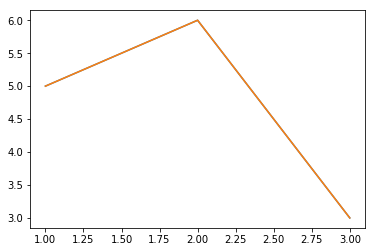

In [84]:
plt.plot([1,2,3],[5,6,3])
plt.show()

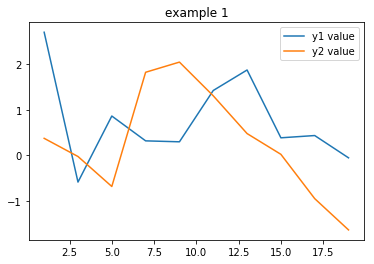

In [98]:
x=np.arange(1,20,2)
y1=np.random.randn(10)
y2=np.random.randn(10)
plt.plot(x,y1,label='y1 value')
plt.plot(x,y2,label='y2 value')
plt.title('example 1')
plt.legend()
plt.show()

In [99]:
%matplotlib inline
# magic function to show graphs automatically

<Container object of 5 artists>

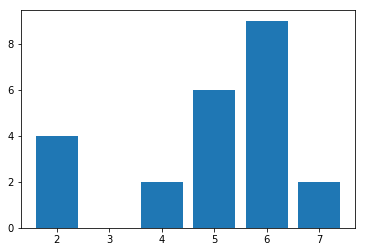

In [102]:
# barcharts and histograms
# histogram shows the distribution of sth
# bar chart shows the value of the category

x=[2,4,5,6,7]
y=[4,2,6,9,2]
plt.bar(x,y)

In [103]:
age=(np.random.random(100)*100).astype(int)
age

array([17, 29, 16, 60, 35, 38, 19, 78, 59, 91, 22, 94, 66, 48, 97, 36, 33,
       12, 60, 80, 95, 37, 59,  4, 17, 40, 45, 17, 23,  5, 59, 61, 29,  9,
       67, 65, 17,  5, 44, 76, 46, 20,  8, 59, 79, 60, 18, 73, 25, 49, 52,
       44, 33, 97, 28, 91,  0,  0, 87, 84, 95, 60, 10, 99, 92,  9, 45, 68,
       35, 64, 66, 25, 43, 56, 31, 97, 97, 75, 96, 55, 57, 42, 37, 11, 26,
        5, 93, 23, 43, 34, 36, 72, 48, 82, 26, 55, 27, 90, 39, 36])

(array([  9.,  10.,  12.,  13.,  12.,   9.,  11.,   6.,   4.,  14.]),
 array([  0. ,   9.9,  19.8,  29.7,  39.6,  49.5,  59.4,  69.3,  79.2,
         89.1,  99. ]),
 <a list of 10 Patch objects>)

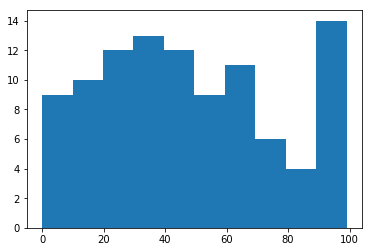

In [104]:
# if we use bar chart to show, there is no enough variable
plt.hist(age)

(array([  9.,  10.,  12.,  13.,  12.,   9.,  11.,   6.,   4.,  14.]),
 array([  0. ,   9.9,  19.8,  29.7,  39.6,  49.5,  59.4,  69.3,  79.2,
         89.1,  99. ]),
 <a list of 10 Patch objects>)

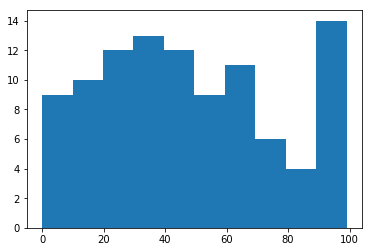

In [110]:
plt.hist(age, bins=10)

(array([  9.,  10.,  12.,  13.,  12.,   9.,  11.,   6.,   4.,  14.]),
 array([  0. ,   9.9,  19.8,  29.7,  39.6,  49.5,  59.4,  69.3,  79.2,
         89.1,  99. ]),
 <a list of 10 Patch objects>)

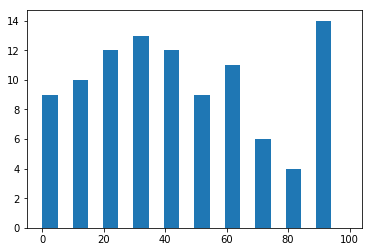

In [112]:
plt.hist(age, bins=10,width=5)

(array([  9.,  10.,  12.,  13.,  12.,   9.,  11.,   6.,   4.,  14.]),
 array([  0. ,   9.9,  19.8,  29.7,  39.6,  49.5,  59.4,  69.3,  79.2,
         89.1,  99. ]),
 <a list of 10 Patch objects>)

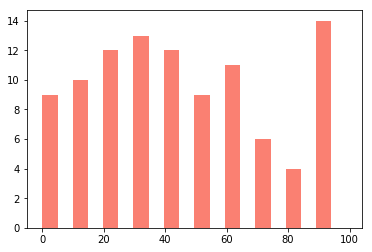

In [116]:
plt.hist(age, bins=10,width=5,color='Salmon')

Text(0.5,1,'random dots')

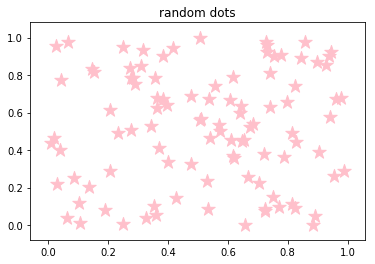

In [122]:
# scatter plot
x=np.random.random(100)
y=np.random.random(100)
plt.scatter(x,y,s=200,marker='*',color='Pink')
plt.title('random dots')

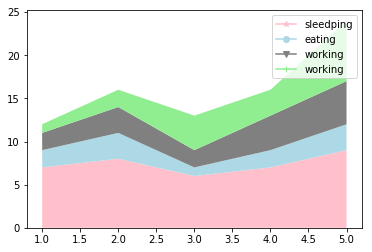

In [141]:
# stack plots
days=[1,2,3,4,5]
sleeping=[7,8,6,7,9]
eating=[2,3,1,2,3]
working=[2,3,2,4,5]
playing=[1,2,4,3,7]
plt.plot([],[],color='pink',label='sleedping',marker='*')
plt.plot([],[],color='lightblue',label='eating',marker='o')
plt.plot([],[],color='grey',label='working',marker='v')
plt.plot([],[],color='lightgreen',label='working',marker='+')
plt.legend()
plt.stackplot(days,sleeping,eating,working,playing,colors=['pink','lightblue','grey','lightgreen'])

([<matplotlib.patches.Wedge at 0x1a6df1bf978>,
 [Text(0.669638,0.872689,'sleeping'),
  Text(-0.7,1.21244,'eating'),
  Text(-0.952628,0.55,'working'),
  Text(-0.143579,-1.09059,'playing')])

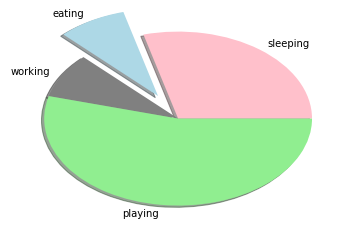

In [160]:
slices=[7,2,2,13]
activities=['sleeping','eating','working','playing']

plt.pie(slices,labels=activities,shadow=True,explode=(0,0.3,0,0),colors=['pink','lightblue','grey','lightgreen'])

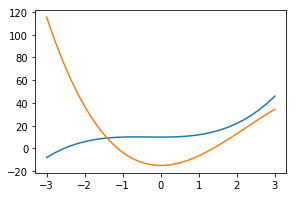

In [152]:
# more serious plotting

x=np.linspace(-3,3,30)
y1=x**3+x**2+10
y2=-1.5*x**3+10*x**2-15
fig,ax=plt.subplots(figsize=(4.5,3))
ax.plot(x,y1)
ax.plot(x,y2)

In [150]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

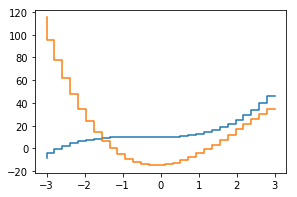

In [157]:
x=np.linspace(-3,3,30)
y1=x**3+x**2+10
y2=-1.5*x**3+10*x**2-15
fig,ax=plt.subplots(figsize=(4.5,3))
ax.step(x,y1)
ax.step(x,y2)

<Container object of 30 artists>

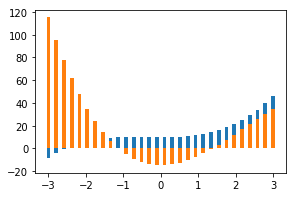

In [155]:
x=np.linspace(-3,3,30)
y1=x**3+x**2+10
y2=-1.5*x**3+10*x**2-15
fig,ax=plt.subplots(figsize=(4.5,3))
ax.bar(x,y1,width=0.1)
ax.bar(x,y2,width=0.1)

<Container object of 30 artists>

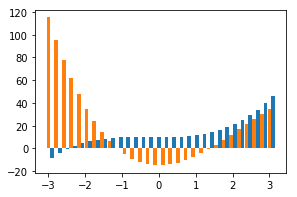

In [158]:
x=np.linspace(-3,3,30)
y1=x**3+x**2+10
y2=-1.5*x**3+10*x**2-15
fig,ax=plt.subplots(figsize=(4.5,3))
ax.bar(x+0.1,y1,width=0.1)
ax.bar(x,y2,width=0.1)

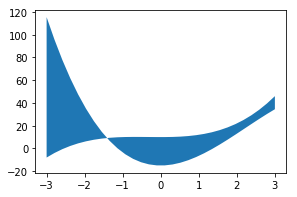

In [159]:
x=np.linspace(-3,3,30)
y1=x**3+x**2+10
y2=-1.5*x**3+10*x**2-15
fig,ax=plt.subplots(figsize=(4.5,3))
ax.fill_between(x,y1,y2)

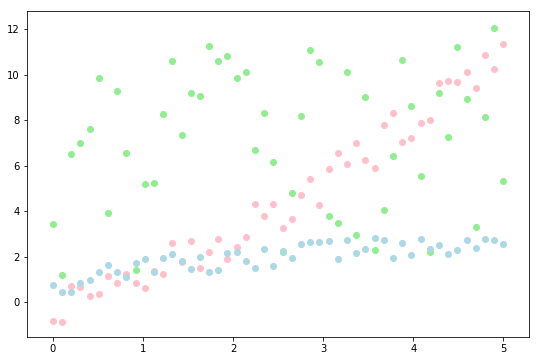

In [172]:
fig,ax=plt.subplots(figsize=(9,6))
x=np.linspace(0,5,50)
ax.scatter(x,-1+x+0.25*x**2+2*np.random.rand(len(x)),color='pink')
ax.scatter(x,np.sqrt(x)+10*np.random.rand(len(x)),color='lightgreen')
ax.scatter(x,np.sqrt(x)+np.random.rand(len(x)),color='lightblue')

In [173]:
fig.savefig('example1.pdf')

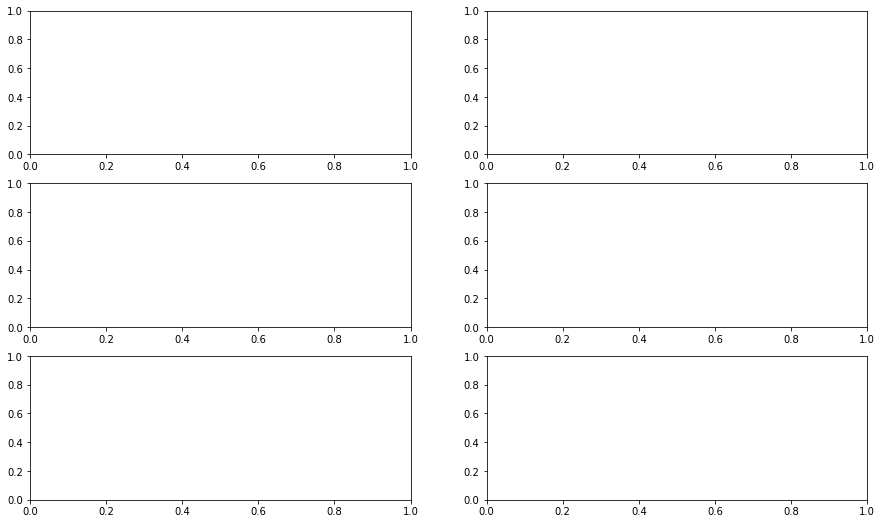

In [179]:
fig,axes=plt.subplots(ncols=2,nrows=3,figsize=(15,9))

In [180]:
type(axes)

numpy.ndarray

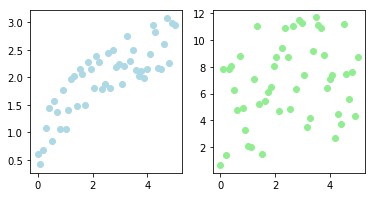

In [185]:
fig,axes=plt.subplots(1,2,figsize=(6,3))
axes[0].scatter(x,np.sqrt(x)+np.random.rand(len(x)),color='lightblue')
axes[1].scatter(x,np.sqrt(x)+10*np.random.rand(len(x)),color='lightgreen')